In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress
import requests
import json
import urllib
import time

#ignore normal warnings
import warnings; warnings.simplefilter('ignore')

import gmaps

# Google developer API key
from config import gkey

# Access maps with unique API key
gmaps.configure(api_key=gkey)


In [5]:
# Storing our Data World Wine filepath in a variable
data_world_wines = "../Group_Project_1_Data_Somms_Final/DataWorldWines.csv"

In [6]:
# Preview the Data World Wine dataframe
data_world_wines_df = pd.read_csv(data_world_wines, encoding="ISO-8859-1")
data_world_wines_df.head()

,Vintage,Country,County,Designation,Points,Price,Province,Title,Variety,Winery
0,1/1/1919,Spain,Cava,1919 Brut Selecci¢,88,$13.00,Catalonia,L'Arboc NV 1919 Brut Selecci¢ Sparkling (Cava),Sparkling Blend,L'Arboc
1,1/1/1929,Italy,Vernaccia di San Gimignano,NaN,87,$14.00,Tuscany,Guidi 1929 2015 Vernaccia di San Gimignano,Vernaccia,Guidi 1929
2,1/1/1929,Italy,Sangiovese di Romagna Superiore,Prugneto,84,$15.00,Central Italy,Poderi dal Nespoli 1929 2011 Prugneto (Sangiov...,Sangiovese,Poderi dal Nespoli 1929
3,1/1/1934,Portugal,NaN,Reserva Velho,93,$495.00,Colares,Adega Viuva Gomes 1934 Reserva Velho Red (Cola...,Ramisco,Adega Viuva Gomes
4,1/1/1945,France,Rivesaltes,Legend Vintage,95,$350.00,Languedoc-Roussillon,Grard Bertrand 1945 Legend Vintage Red (Rives...,Red Blend,Grard Bertrand


# Data Cleansing
Convert Vintage into Vintage_Float, Price into Price_Float for data exploration

In [7]:
#explore the dytpe and info on Vintage
data_world_wines_df['Vintage'].describe()

count        24997
unique          42
top       1/1/2013
freq          3138
Name: Vintage, dtype: object

In [8]:
#convert Vintage into a float, add to new column Vintage_Float
data_world_wines_df['Vintage_Float'] = pd.DatetimeIndex(data_world_wines_df['Vintage']).year
data_world_wines_df.head()

,Vintage,Country,County,Designation,Points,Price,Province,Title,Variety,Winery,Vintage_Float
0,1/1/1919,Spain,Cava,1919 Brut Selecci¢,88,$13.00,Catalonia,L'Arboc NV 1919 Brut Selecci¢ Sparkling (Cava),Sparkling Blend,L'Arboc,1919
1,1/1/1929,Italy,Vernaccia di San Gimignano,NaN,87,$14.00,Tuscany,Guidi 1929 2015 Vernaccia di San Gimignano,Vernaccia,Guidi 1929,1929
2,1/1/1929,Italy,Sangiovese di Romagna Superiore,Prugneto,84,$15.00,Central Italy,Poderi dal Nespoli 1929 2011 Prugneto (Sangiov...,Sangiovese,Poderi dal Nespoli 1929,1929
3,1/1/1934,Portugal,NaN,Reserva Velho,93,$495.00,Colares,Adega Viuva Gomes 1934 Reserva Velho Red (Cola...,Ramisco,Adega Viuva Gomes,1934
4,1/1/1945,France,Rivesaltes,Legend Vintage,95,$350.00,Languedoc-Roussillon,Grard Bertrand 1945 Legend Vintage Red (Rives...,Red Blend,Grard Bertrand,1945


In [9]:
#explore the dytpe and info on Vintage
data_world_wines_df['Price'].describe()

count      23375
unique       248
top       $20.00
freq        1327
Name: Price, dtype: object

In [10]:
#convert Price into a float, add to new column Price_Float
data_world_wines_df['Price_Float'] = data_world_wines_df['Price'].replace('[\$,]', '', regex=True).astype(float)
data_world_wines_df.head()

,Vintage,Country,County,Designation,Points,Price,Province,Title,Variety,Winery,Vintage_Float,Price_Float
0,1/1/1919,Spain,Cava,1919 Brut Selecci¢,88,$13.00,Catalonia,L'Arboc NV 1919 Brut Selecci¢ Sparkling (Cava),Sparkling Blend,L'Arboc,1919,13.0
1,1/1/1929,Italy,Vernaccia di San Gimignano,NaN,87,$14.00,Tuscany,Guidi 1929 2015 Vernaccia di San Gimignano,Vernaccia,Guidi 1929,1929,14.0
2,1/1/1929,Italy,Sangiovese di Romagna Superiore,Prugneto,84,$15.00,Central Italy,Poderi dal Nespoli 1929 2011 Prugneto (Sangiov...,Sangiovese,Poderi dal Nespoli 1929,1929,15.0
3,1/1/1934,Portugal,NaN,Reserva Velho,93,$495.00,Colares,Adega Viuva Gomes 1934 Reserva Velho Red (Cola...,Ramisco,Adega Viuva Gomes,1934,495.0
4,1/1/1945,France,Rivesaltes,Legend Vintage,95,$350.00,Languedoc-Roussillon,Grard Bertrand 1945 Legend Vintage Red (Rives...,Red Blend,Grard Bertrand,1945,350.0


# Data Exploration
Dive deeper into the data to understand the distrubtion and answer following questions:
1. How many countries the dataset contains? 
<br> - What are the number of wines by country?
2. What is the price range of wine in this dataset?
<br> - What are the 5 most expensive wines in the dataset?
3. What is the points range of wine in this data set?
<br> - What are the 5 best rated (highest point) wines in the dataset?

In [11]:
# How many countries the dataset contains? What are the number of wines by country?
data_world_wines_df['Country'].value_counts()

US                10576
France             4058
Italy              3704
Spain              1255
Portugal           1108
Chile               924
Argentina           760
Austria             692
Australia           465
Germany             419
New Zealand         273
South Africa        267
Israel              113
Greece               74
Canada               52
Bulgaria             31
Hungary              29
Romania              28
Uruguay              25
Georgia              20
Mexico               18
Turkey               16
Croatia              15
Slovenia             14
Moldova              11
Brazil                9
England               7
Lebanon               5
Macedonia             4
Morocco               4
Ukraine               3
Serbia                3
Luxembourg            2
Peru                  2
Czech Republic        1
India                 1
Switzerland           1
Name: Country, dtype: int64

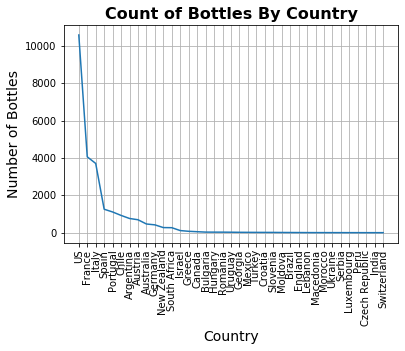

In [12]:
#plot and save graph
plt.plot(data_world_wines_df['Country'].value_counts())
plt.xticks(rotation='vertical')
plt.grid(True)

plt.title('Count of Bottles By Country',fontsize=16,fontweight="bold")
plt.ylabel('Number of Bottles',fontsize=14)
plt.xlabel('Country',fontsize=14)

plt.savefig('Images/1_CountByCountry.png')

plt.show()

In [13]:
#What is the price range of wine in this dataset?
data_world_wines_df['Price_Float'].describe()

count    23375.00000
mean        35.46708
std         40.83522
min          4.00000
25%         17.00000
50%         25.00000
75%         42.00000
max       2500.00000
Name: Price_Float, dtype: float64

In [14]:
#top 6 countries by wine count
top6_countries = data_world_wines_df['Country'].value_counts().head(6).index
top6_countries

Index(['US', 'France', 'Italy', 'Spain', 'Portugal', 'Chile'], dtype='object')

In [15]:
#isolate data from only top 6 countries
data_world_wines_df_top6 = data_world_wines_df[data_world_wines_df['Country'].isin(top6_countries)]
data_world_wines_df_top6.head()

,Vintage,Country,County,Designation,Points,Price,Province,Title,Variety,Winery,Vintage_Float,Price_Float
0,1/1/1919,Spain,Cava,1919 Brut Selecci¢,88,$13.00,Catalonia,L'Arboc NV 1919 Brut Selecci¢ Sparkling (Cava),Sparkling Blend,L'Arboc,1919,13.0
1,1/1/1929,Italy,Vernaccia di San Gimignano,NaN,87,$14.00,Tuscany,Guidi 1929 2015 Vernaccia di San Gimignano,Vernaccia,Guidi 1929,1929,14.0
2,1/1/1929,Italy,Sangiovese di Romagna Superiore,Prugneto,84,$15.00,Central Italy,Poderi dal Nespoli 1929 2011 Prugneto (Sangiov...,Sangiovese,Poderi dal Nespoli 1929,1929,15.0
3,1/1/1934,Portugal,NaN,Reserva Velho,93,$495.00,Colares,Adega Viuva Gomes 1934 Reserva Velho Red (Cola...,Ramisco,Adega Viuva Gomes,1934,495.0
4,1/1/1945,France,Rivesaltes,Legend Vintage,95,$350.00,Languedoc-Roussillon,Grard Bertrand 1945 Legend Vintage Red (Rives...,Red Blend,Grard Bertrand,1945,350.0


In [16]:
data_world_wines_df_top6['Country'].value_counts()

US          10576
France       4058
Italy        3704
Spain        1255
Portugal     1108
Chile         924
Name: Country, dtype: int64

In [17]:
#find top 5 the most expensive wine
data_world_wines_df.sort_values(by='Price_Float',ascending=False).head(5)

,Vintage,Country,County,Designation,Points,Price,Province,Title,Variety,Winery,Vintage_Float,Price_Float
20970,1/1/2014,France,Pomerol,NaN,96,"$2,500.00",Bordeaux,Chteau Ptrus 2014 Pomerol,Bordeaux-style Red Blend,Chteau Ptrus,2014,2500.0
10344,1/1/2010,France,Saint-milion,NaN,100,"$1,500.00",Bordeaux,Chteau Cheval Blanc 2010 Saint-milion,Bordeaux-style Red Blend,Chteau Cheval Blanc,2010,1500.0
7158,1/1/2009,Australia,Eden Valley,Hill of Grace,91,$780.00,South Australia,Henschke 2009 Hill of Grace Shiraz (Eden Valley),Shiraz,Henschke,2009,780.0
22902,1/1/2015,Germany,NaN,Kiedrich Grfenberg Trockenbeerenauslese,98,$775.00,Rheingau,Robert Weil 2015 Kiedrich Grfenberg Trockenbe...,Riesling,Robert Weil,2015,775.0
15968,1/1/2012,Spain,Priorat,El Perer,96,$770.00,Catalonia,Marco Abella 2012 El Perer Carignan (Priorat),Carignan,Marco Abella,2012,770.0


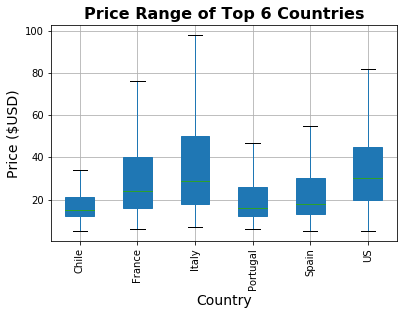

In [18]:
#boxplot Price Range Top 6 Countries

bplot1 = data_world_wines_df_top6.boxplot('Price_Float',
                                          by="Country",
                                          showfliers=False,
                                          patch_artist=True
                                         )

plt.xticks(rotation='vertical')
plt.grid(True)

plt.title('Price Range of Top 6 Countries',fontsize=16,fontweight="bold")
plt.suptitle('')
plt.ylabel('Price ($USD)',fontsize=14)
plt.xlabel('Country',fontsize=14)


plt.savefig('Images/2_PriceRangeTop6.png')

plt.show()

In [19]:
#find the 5 best rated (highest point) wines
data_world_wines_df.sort_values(by='Points',ascending=False).head(5)

,Vintage,Country,County,Designation,Points,Price,Province,Title,Variety,Winery,Vintage_Float,Price_Float
3631,1/1/2007,Italy,Brunello di Montalcino,Cerretalto,100,$270.00,Tuscany,Casanova di Neri 2007 Cerretalto (Brunello di ...,Sangiovese Grosso,Casanova di Neri,2007,270.0
10344,1/1/2010,France,Saint-milion,NaN,100,"$1,500.00",Bordeaux,Chteau Cheval Blanc 2010 Saint-milion,Bordeaux-style Red Blend,Chteau Cheval Blanc,2010,1500.0
2431,1/1/2006,US,Napa Valley,NaN,100,$200.00,California,Cardinale 2006 Cabernet Sauvignon (Napa Valley),Cabernet Sauvignon,Cardinale,2006,200.0
5321,1/1/2008,France,Champagne,Cristal Vintage Brut,100,$250.00,Champagne,Louis Roederer 2008 Cristal Vintage Brut (Cham...,Champagne Blend,Louis Roederer,2008,250.0
9981,1/1/2010,US,Sonoma Coast,Hirsch Vineyard,99,$75.00,California,Williams Selyem 2010 Hirsch Vineyard Pinot Noi...,Pinot Noir,Williams Selyem,2010,75.0


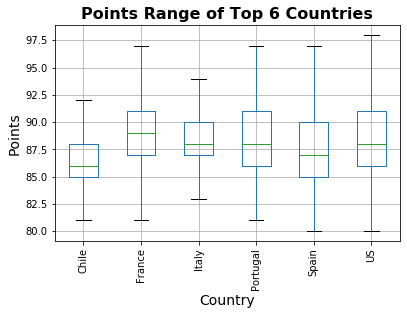

In [20]:
#Points range by country
bplot2 = data_world_wines_df_top6.boxplot('Points',by="Country",showfliers=False)
plt.xticks(rotation='vertical')
plt.grid(True)

plt.title('Points Range of Top 6 Countries',fontsize=16,fontweight="bold")
plt.suptitle('')
plt.ylabel('Points',fontsize=14)
plt.xlabel('Country',fontsize=14)

plt.savefig('Images/3_PointRangeTop6.png')

plt.show()

# Data Analysis
1. Is there any relationship between the Points and Price?
2. If so, how do Points influence Price?
3. Is this influence statistically significant?
4. Is there any difference between the degree of influence between the countries?
5. If so, which country has the least influence? In other words, which country would produce the best value wines?
6. Based on the dataset, what are the best wines to pick for value, at 25% (USD17), average(USD35), and 75%(USD42), given the price range of the dataset?

In [21]:
#explore the relationship between Points and Price
#groupby Points
data_world_wines_df_grouped_points = data_world_wines_df.groupby(['Points'])
data_world_wines_df_grouped_points.mean()

,Vintage_Float,Price_Float
Points,,
80,2008.565217,15.463768
81,2009.150376,16.734848
82,2009.138801,18.876623
83,2009.435374,18.733333
84,2009.894207,19.732980
85,2010.327030,20.634684
86,2010.471371,22.046721
87,2010.643979,24.089380
88,2011.071560,28.308500


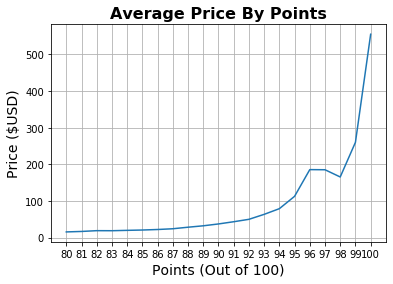

In [22]:
#plot chart of points against price
x_axis = np.arange(80,101,1)
plt.plot(x_axis,data_world_wines_df_grouped_points.mean()['Price_Float'])
plt.xticks(x_axis)
plt.grid(True)

plt.title('Average Price By Points',fontsize=16,fontweight="bold")
plt.ylabel('Price ($USD)',fontsize=14)
plt.xlabel('Points (Out of 100)',fontsize=14)


plt.savefig('Images/4_AvgPriceByPoints.png')

plt.show()

In [23]:
# Regression of Points vs. Price
#If so, how do Points influence Price?
x_axis = np.arange(80,101,1)
(slope, intercept, r_value, p_value, std_err) = linregress(x_axis, data_world_wines_df_grouped_points.mean()['Price_Float'])
fit = slope * x_axis + intercept

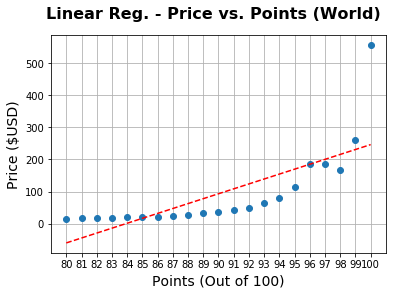

In [24]:
# plot chart
fig, ax = plt.subplots()

fig.suptitle("Linear Reg. - Price vs. Points (World)", fontsize=16, fontweight="bold")
ax.set_xlabel('Points (Out of 100)',fontsize=14)
ax.set_ylabel('Price ($USD)',fontsize=14)
plt.xticks(x_axis)
plt.grid(True)

ax.plot(x_axis, data_world_wines_df_grouped_points.mean()['Price_Float'], linewidth=0, marker='o')
#'b--' blue line with dashes
ax.plot(x_axis, fit, 'r--')
plt.savefig('Images/5_RegPriceVsPoints_World.png')
plt.show()

In [25]:
#3. Is this influence statistically significant?
#p-value against 0.05
if p_value <0.05:
    print(f'Since p-value({p_value}) is < 0.05, the relationship between Price and Points is stistically significant at 95% confidence level')
else:
       print(f'Since p-value is > 0.05, the relationship between Price and Points is NOT stistically significant at 95% confidence level')
 


Since p-value(0.00010345483887225268) is < 0.05, the relationship between Price and Points is stistically significant at 95% confidence level


In [26]:
#is it a good fit?
r_sq = r_value **2
r_sq

0.5564581510285337

In [27]:
#Recall top 6 countries
top6_countries

Index(['US', 'France', 'Italy', 'Spain', 'Portugal', 'Chile'], dtype='object')

In [28]:
#Is there any difference between the degree of influence between the countries?
#group df by country then points
data_world_wines_df_top6_grouped_country_points = data_world_wines_df_top6.groupby(['Country','Points']).mean()
data_world_wines_df_top6_grouped_country_points


Vintage_Float  Price_Float
Country Points                            
Chile   80        2008.750000    13.750000
        81        2010.090909    12.545455
        82        2010.111111    13.111111
        83        2010.257576    13.818182
        84        2009.666667    13.510417
...                       ...          ...
US      96        2009.500000    87.285714
        97        2007.666667   156.666667
        98        2008.555556    89.222222
        99        2009.750000   131.250000
        100       2006.000000   200.000000

[112 rows x 2 columns]

In [31]:
#Regression each country
(slope_us, intercept_us, r_value_us, p_value_us, std_err_us) = linregress(data_world_wines_df_top6_grouped_country_points.loc['US'].index, data_world_wines_df_top6_grouped_country_points.loc['US']['Price_Float'].fillna(0))
fit_us = slope_us * x_axis + intercept_us

(slope_fr, intercept_fr, r_value_fr, p_value_fr, std_err_fr) = linregress(data_world_wines_df_top6_grouped_country_points.loc['France'].index, data_world_wines_df_top6_grouped_country_points.loc['France']['Price_Float'].fillna(0))
fit_fr = slope_fr * x_axis + intercept_fr

(slope_italy, intercept_italy, r_value_italy, p_value_italy, std_err_italy) = linregress(data_world_wines_df_top6_grouped_country_points.loc['Italy'].index, data_world_wines_df_top6_grouped_country_points.loc['Italy']['Price_Float'].fillna(0))
fit_italy = slope_italy * x_axis + intercept_italy

(slope_spain, intercept_spain, r_value_spain, p_value_spain, std_err_spain) = linregress(data_world_wines_df_top6_grouped_country_points.loc['Spain'].index, data_world_wines_df_top6_grouped_country_points.loc['Spain']['Price_Float'].fillna(0))
fit_spain = slope_spain * x_axis + intercept_spain

(slope_portugal, intercept_portugal, r_value_portugal, p_value_portugal, std_err_portugal) = linregress(data_world_wines_df_top6_grouped_country_points.loc['Portugal'].index, data_world_wines_df_top6_grouped_country_points.loc['Portugal']['Price_Float'].fillna(0))
fit_portugal = slope_portugal * x_axis + intercept_portugal

(slope_chile, intercept_chile, r_value_chile, p_value_chile, std_err_chile) = linregress(data_world_wines_df_top6_grouped_country_points.loc['Chile'].index, data_world_wines_df_top6_grouped_country_points.loc['Chile']['Price_Float'].fillna(0))
fit_chile = slope_chile * x_axis + intercept_chile

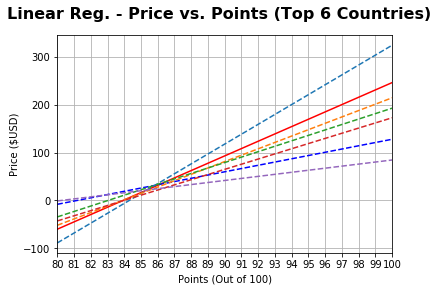

In [32]:
#plot without lengend
fig, ax = plt.subplots()

x_axis = np.arange(80,101,1)
fig.suptitle("Linear Reg. - Price vs. Points (Top 6 Countries)", fontsize=16, fontweight="bold")

ax.set_xlabel('Points (Out of 100)')
ax.set_ylabel('Price ($USD)')
plt.xticks(x_axis)
plt.xlim(left=80)
plt.grid(True)

# ax.plot(x_axis, data_world_wines_df_grouped_points.mean()['Price_Float'], linewidth=0, marker='o')
#'b--' blue line with dashes
ax.plot(x_axis, fit, 'r',label='World')
ax.plot(x_axis, fit_us, 'b--',label='US')
ax.plot(x_axis, fit_fr, '--',label='France')
ax.plot(x_axis, fit_italy, '--',label='Italy')
ax.plot(x_axis, fit_spain, '--',label='Spain')
ax.plot(x_axis, fit_portugal,'--',label='Portugal')
ax.plot(x_axis, fit_chile, '--',label='Chile')

plt.savefig('Images/6_RegPriceVsPoints_Top6_nolegend.png')


plt.show()

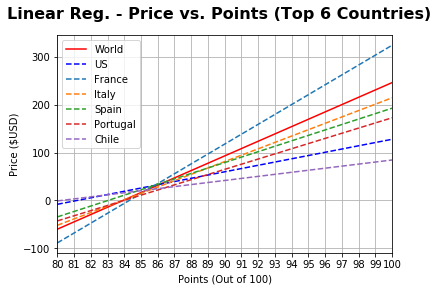

In [33]:
fig, ax = plt.subplots()

x_axis = np.arange(80,101,1)
fig.suptitle("Linear Reg. - Price vs. Points (Top 6 Countries)", fontsize=16, fontweight="bold")

ax.set_xlabel('Points (Out of 100)')
ax.set_ylabel('Price ($USD)')
plt.xticks(x_axis)
plt.xlim(left=80)
plt.grid(True)

# ax.plot(x_axis, data_world_wines_df_grouped_points.mean()['Price_Float'], linewidth=0, marker='o')
#'b--' blue line with dashes
ax.plot(x_axis, fit, 'r',label='World')
ax.plot(x_axis, fit_us, 'b--',label='US')
ax.plot(x_axis, fit_fr, '--',label='France')
ax.plot(x_axis, fit_italy, '--',label='Italy')
ax.plot(x_axis, fit_spain, '--',label='Spain')
ax.plot(x_axis, fit_portugal,'--',label='Portugal')
ax.plot(x_axis, fit_chile, '--',label='Chile')
plt.legend()

plt.savefig('Images/7_RegPriceVsPoints_Top6_withlegend.png')


plt.show()

In [34]:
#Is this influence statistically significant, for each country?
#p-value against 0.05
pvalues = [
    p_value_us,
    p_value_fr,
    p_value_italy,
    p_value_spain,
    p_value_portugal,
    p_value_chile]

#combined top 6 countries and p-values into dictionary
top6_dict_pvalue = dict(zip(top6_countries, pvalues))

top6_dict_pvalue

{'US': 1.0823773823138127e-06,
 'France': 0.002004643901642081,
 'Italy': 0.001145664861773581,
 'Spain': 5.785363040489683e-05,
 'Portugal': 0.016043744529843997,
 'Chile': 3.671208782747836e-05}

In [34]:
#test all 6 countries for p-value
for pvalue in top6_dict_pvalue:
    if top6_dict_pvalue[pvalue] <0.05:
        print(f'Test for {pvalue} : \nSince p-value is < 0.05, the relationship between Price and Points is stistically significant at 95% confidence level')
        print('------------------------------------------------')
    else:
           print(f'Test for {pvalue} : \nSince p-value is > 0.05, the relationship between Price and Points is NOT stistically significant at 95% confidence level')


Test for US : 
Since p-value is < 0.05, the relationship between Price and Points is stistically significant at 95% confidence level
------------------------------------------------
Test for France : 
Since p-value is < 0.05, the relationship between Price and Points is stistically significant at 95% confidence level
------------------------------------------------
Test for Italy : 
Since p-value is < 0.05, the relationship between Price and Points is stistically significant at 95% confidence level
------------------------------------------------
Test for Spain : 
Since p-value is < 0.05, the relationship between Price and Points is stistically significant at 95% confidence level
------------------------------------------------
Test for Portugal : 
Since p-value is < 0.05, the relationship between Price and Points is stistically significant at 95% confidence level
------------------------------------------------
Test for Chile : 
Since p-value is < 0.05, the relationship between Price 

# Bonus - US Wines By State

## Which state has the best value wine?

In [35]:
#isolate US only
data_world_wines_df_us = data_world_wines_df[data_world_wines_df['Country']=='US']
data_world_wines_df_us.head()

,Vintage,Country,County,Designation,Points,Price,Province,Title,Variety,Winery,Vintage_Float,Price_Float
11,1/1/1987,US,Sonoma Valley,Cherryblock,89,$170.00,California,Sebastiani 1987 Cherryblock Cabernet Sauvignon...,Cabernet Sauvignon,Sebastiani,1987,170.0
15,1/1/1991,US,Sonoma County,Brut L.D.,93,$60.00,California,Iron Horse 1991 Brut L.D. (Sonoma County),Champagne Blend,Iron Horse,1991,60.0
16,1/1/1992,US,Carneros,Royal Cuvee Brut,88,$22.00,California,Gloria Ferrer 1992 Royal Cuvee Brut (Carneros),Champagne Blend,Gloria Ferrer,1992,22.0
17,1/1/1992,US,Anderson Valley,Private Reserve Brut,91,$32.00,California,Pacific Echo 1992 Private Reserve Brut (Anders...,Champagne Blend,Pacific Echo,1992,32.0
19,1/1/1993,US,Oregon,NaN,86,$24.00,Oregon,Rex Hill 1993 Oregon,Champagne Blend,Rex Hill,1993,24.0


In [36]:
#explore states
data_world_wines_df_us['Province'].describe()

count          10576
unique            20
top       California
freq            7066
Name: Province, dtype: object

In [37]:
#groupby states
data_world_wines_df_us_grouped_province = data_world_wines_df_us.groupby(['Province'])
data_world_wines_df_us_grouped_province.mean()

,Points,Vintage_Float,Price_Float
Province,,,
America,87.300000,2011.000000,18.700000
Arizona,85.142857,2009.142857,29.166667
California,88.637985,2010.554628,39.366269
Colorado,85.875000,2011.812500,34.625000
Connecticut,84.000000,1999.000000,15.000000
Idaho,86.615385,2011.115385,19.880000
Massachusetts,83.500000,2009.000000,21.000000
Michigan,86.333333,2011.733333,40.133333
Missouri,83.500000,2008.666667,21.500000


In [38]:
#Use geocode to get state lat and lng
us_states = data_world_wines_df_us_grouped_province.mean().index
lats =[]
lngs =[]

for state in us_states:
    try:
        params = {"address": state, "key": gkey}

        # Build URL using the Google Maps API
        base_url = "https://maps.googleapis.com/maps/api/geocode/json"

        # Run request
        response = requests.get(base_url, params=params)

        # Convert to JSON
        state_geo = response.json()

        # Extract lat/lng
        lats.append(state_geo["results"][0]["geometry"]["location"]["lat"])
        lngs.append(state_geo["results"][0]["geometry"]["location"]["lng"])
        print(state)
        print (state_geo["results"][0]["geometry"]["location"]["lat"])
        print (state_geo["results"][0]["geometry"]["location"]["lng"])
        time.sleep(1)
    except (urllib.error.HTTPError, NameError, KeyError, IndexError):
        print(f'{county} not found...')
    
    # Print results


America
37.09024
-95.712891
Arizona
34.0489281
-111.0937311
California
36.778261
-119.4179324
Colorado
39.5500507
-105.7820674
Connecticut
41.6032207
-73.087749
Idaho
44.0682019
-114.7420408
Massachusetts
42.4072107
-71.3824374
Michigan
44.3148443
-85.60236429999999
Missouri
37.9642529
-91.8318334
New Jersey
40.0583238
-74.4056612
New Mexico
34.5199402
-105.8700901
New York
40.7127753
-74.0059728
North Carolina
35.7595731
-79.01929969999999
Ohio
40.4172871
-82.90712300000001
Oregon
43.8041334
-120.5542012
Pennsylvania
41.2033216
-77.1945247
Texas
31.9685988
-99.9018131
Virginia
37.4315734
-78.6568942
Washington
47.7510741
-120.7401385
Washington-Oregon
45.5469616
-123.1386021


In [40]:
#make lat long into dataFrame
data_world_wines_df_us_grouped_province_geocodes = data_world_wines_df_us_grouped_province.mean()
data_world_wines_df_us_grouped_province_geocodes['Lat'] = lats
data_world_wines_df_us_grouped_province_geocodes['Lng'] = lngs
data_world_wines_df_us_grouped_province_geocodes['Price_Per_Points'] = data_world_wines_df_us_grouped_province_geocodes['Price_Float']/data_world_wines_df_us_grouped_province_geocodes['Points']
data_world_wines_df_us_grouped_province_geocodes

,Points,Vintage_Float,Price_Float,Lat,Lng,Price_Per_Points
Province,,,,,,
America,87.300000,2011.000000,18.700000,37.090240,-95.712891,0.214204
Arizona,85.142857,2009.142857,29.166667,34.048928,-111.093731,0.342562
California,88.637985,2010.554628,39.366269,36.778261,-119.417932,0.444124
Colorado,85.875000,2011.812500,34.625000,39.550051,-105.782067,0.403202
Connecticut,84.000000,1999.000000,15.000000,41.603221,-73.087749,0.178571
Idaho,86.615385,2011.115385,19.880000,44.068202,-114.742041,0.229520
Massachusetts,83.500000,2009.000000,21.000000,42.407211,-71.382437,0.251497
Michigan,86.333333,2011.733333,40.133333,44.314844,-85.602364,0.464865
Missouri,83.500000,2008.666667,21.500000,37.964253,-91.831833,0.257485


In [41]:
#understand the data points
data_world_wines_df_us_grouped_province['Price_Float'].count()

Province
America                10
Arizona                 6
California           7044
Colorado               16
Connecticut             1
Idaho                  25
Massachusetts           2
Michigan               15
Missouri                6
New Jersey              2
New Mexico              8
New York              523
North Carolina          7
Ohio                    1
Oregon               1062
Pennsylvania            6
Texas                  11
Virginia              133
Washington           1659
Washington-Oregon       1
Name: Price_Float, dtype: int64

In [42]:
#rank to see the best value (lowest price per points)
data_world_wines_df_us_grouped_province_geocodes.sort_values(by='Price_Per_Points')

,Points,Vintage_Float,Price_Float,Lat,Lng,Price_Per_Points
Province,,,,,,
Connecticut,84.000000,1999.000000,15.000000,41.603221,-73.087749,0.178571
Ohio,83.000000,2009.000000,15.000000,40.417287,-82.907123,0.180723
America,87.300000,2011.000000,18.700000,37.090240,-95.712891,0.214204
New Jersey,83.000000,2009.000000,19.000000,40.058324,-74.405661,0.228916
Idaho,86.615385,2011.115385,19.880000,44.068202,-114.742041,0.229520
Massachusetts,83.500000,2009.000000,21.000000,42.407211,-71.382437,0.251497
Missouri,83.500000,2008.666667,21.500000,37.964253,-91.831833,0.257485
Pennsylvania,84.166667,2006.666667,22.166667,41.203322,-77.194525,0.263366
New York,87.167300,2011.336502,23.904398,40.712775,-74.005973,0.274236


## Price Level By State

In [43]:
# Store latitude and longitude in locations
locations = data_world_wines_df_us_grouped_province_geocodes[["Lat", "Lng"]]

# Fill NaN values and convert to float
price_level = data_world_wines_df_us_grouped_province_geocodes["Price_Float"].astype(float)
    

In [44]:
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=price_level, 
                                 dissipating=False, 
                                 point_radius=2)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

## Points Level By State

In [45]:
# Store latitude and longitude in locations
locations = data_world_wines_df_us_grouped_province_geocodes[["Lat", "Lng"]]

# Fill NaN values and convert to float
points_level = data_world_wines_df_us_grouped_province_geocodes["Points"].astype(float)
    

In [46]:
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=points_level, 
                                 dissipating=False, 
                                 point_radius=2)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

## Price per Point by State

In [47]:
# Store latitude and longitude in locations
locations = data_world_wines_df_us_grouped_province_geocodes[["Lat", "Lng"]]

# Fill NaN values and convert to float
price_per_points_level = data_world_wines_df_us_grouped_province_geocodes["Price_Per_Points"].astype(float)
    

In [48]:
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=price_per_points_level, 
                                 dissipating=False, 
                                 point_radius=2)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))